In [1]:
!pip install pandas openpyxl
!pip install nltk
!pip install bertopic sentence-transformers umap-learn hdbscan

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import nltk
import re
from collections import Counter

# Download NLTK stopwords if you haven't already
nltk.download('stopwords')
from nltk.corpus import stopwords

# Replace with your actual file path (Excel or CSV).
# Example for Excel:
df = pd.read_excel("la_topics_combined(result).xlsx")
# If CSV: df = pd.read_csv("abortion_topics.csv")

# Check the first few rows
print(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samru\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


                                                text  topic
0  of course an embryo is a person ! if it were a...     -1
1  we must always see others as christ sees us , ...      3
2  # donrients : people are n't just killed by gu...     22
3  never during a pregnancy does a pregnant perso...     27
4  rt @ createdequalorg : `` we 're all human , a...     34


In [53]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the default English stopwords
default_stopwords = set(stopwords.words('english'))

# Define your custom stop words (adjust these based on your dataset)
custom_stopwords = {"the", "you", "and", "it", "to", "on", "that", "is", "st", "for", "an", "them","#", ".", "@", ",", "?", "!", "&", ":", "``", "...", "''", "'s", "n't", "-", "1", "'m", "'re", "2", ")", "(", "4", "'ll", "%", ";", "'d", "'", "'ve", "--", "="}

# Merge the two sets
stop_words = default_stopwords.union(custom_stopwords)

def remove_stopwords(text):
    # Lowercase the text (recommended to standardize)
    text = text.lower()
    # Split into tokens based on whitespace
    tokens = text.split()
    # Filter out tokens that are in the stop_words set
    tokens = [token for token in tokens if token not in stop_words]
    # Reconstruct into a single string
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
def remove_event_keywords(text, high_freq_tokens):
    tokens = text.split()
    tokens = [token for token in tokens if token not in high_freq_tokens]
    return ' '.join(tokens)

In [63]:
print(df.columns)

Index(['tweet', 'topic', 'cleaned', 'tokens', 'unified_text', 'text_cleaned'], dtype='object')


In [65]:
# Apply remove_stopwords to each tweet
df["text_cleaned"] = df["tweet"].astype(str).apply(remove_stopwords)

# Inspect the result
print(df[["tweet", "text_cleaned"]].head())

                                               tweet  \
0                                               text   
1  of course an embryo is a person ! if it were a...   
2  we must always see others as christ sees us , ...   
3  # donrients : people are n't just killed by gu...   
4  never during a pregnancy does a pregnant perso...   

                                        text_cleaned  
0                                               text  
1      course embryo person puppy desire abort semst  
2  must always see others christ sees us must see...  
3  donrients people killed guns 9 people died sad...  
4  never pregnancy pregnant person body cease sup...  


In [4]:
import pandas as pd
import re
from collections import Counter
import nltk

# Download required NLTK data (if not already downloaded)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define a simple text cleaning function: lowercase and remove non-letter characters.
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Load your Excel file (assuming the tweets are in the first column)
df = pd.read_excel("la_topics_combined(result).xlsx", header=None)
df.columns = ['tweet', 'topic']  # Rename column(s) as needed

# Apply cleaning to the tweet column.
df['text_cleaned'] = df['tweet'].astype(str).apply(clean_text)

# -------------------------------
# Compute occurrence frequency based on tweets
# -------------------------------
# We want to count how many tweets (not tokens overall) contain each keyword.
num_tweets = len(df)
tweet_freq = Counter()
for tweet in df["text_cleaned"]:
    # Using set() ensures each token is counted only once per tweet.
    tokens = set(tweet.split())
    tweet_freq.update(tokens)

# Print keyword frequencies and occurrence ratios.
print("Keyword | Frequency in Tweets | Occurrence Ratio")
for token, count in tweet_freq.most_common():
    ratio = count / num_tweets
    print(f"{token} | {count} | {ratio:.4f}")

# -------------------------------
# Identify high frequency tokens based on occurrence ratio > 0.75.
# -------------------------------
high_freq_tokens = { token for token, count in tweet_freq.items() if (count / num_tweets) > 0.75 }

# Print the high-frequency tokens along with their frequency and ratio.
if high_freq_tokens:
    print("\nEvent Representative Keywords to be Removed (Occurrence Ratio > 0.75):")
    for token in high_freq_tokens:
        ratio = tweet_freq[token] / num_tweets
        print(f"{token} | {tweet_freq[token]} | {ratio:.4f}")
else:
    print("\nNo tokens exceed the 0.75 ratio threshold.")

# -------------------------------
# Define function to remove high frequency tokens from text.
# -------------------------------
def remove_event_keywords(text, tokens_to_remove):
    tokens = text.split()
    # Remove any token that is in the high frequency tokens set.
    filtered_tokens = [token for token in tokens if token not in tokens_to_remove]
    return ' '.join(filtered_tokens)

# Apply the removal function to each tweet.
df["text_preprocessed"] = df["text_cleaned"].apply(lambda x: remove_event_keywords(x, high_freq_tokens))

# Inspect the final preprocessed text alongside the original tweet.
print("\nSample output after removing high-frequency tokens:")
print(df[["tweet", "text_preprocessed"]].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Keyword | Frequency in Tweets | Occurrence Ratio
semst | 932 | 0.9989
the | 371 | 0.3976
to | 311 | 0.3333
a | 256 | 0.2744
is | 249 | 0.2669
of | 215 | 0.2304
i | 171 | 0.1833
you | 166 | 0.1779
it | 160 | 0.1715
that | 153 | 0.1640
and | 151 | 0.1618
for | 151 | 0.1618
in | 144 | 0.1543
s | 141 | 0.1511
nt | 140 | 0.1501
abortion | 128 | 0.1372
are | 111 | 0.1190
do | 106 | 0.1136
not | 104 | 0.1115
be | 97 | 0.1040
have | 94 | 0.1008
we | 86 | 0.0922
life | 84 | 0.0900
on | 84 | 0.0900
with | 79 | 0.0847
women | 78 | 0.0836
if | 74 | 0.0793
they | 70 | 0.0750
your | 64 | 0.0686
all | 63 | 0.0675
but | 63 | 0.0675
right | 62 | 0.0665
people | 61 | 0.0654
their | 57 | 0.0611
what | 56 | 0.0600
my | 55 | 0.0589
an | 54 | 0.0579
this | 54 | 0.0579
no | 53 | 0.0568
just | 53 | 0.0568
who | 53 | 0.0568
about | 52 | 0.0557
babies | 52 | 0.0557
can | 51 | 0.0547
so | 51 | 0.0547
at | 50 | 0.0536
unborn | 50 | 0.0536
as | 48 | 0.0514
when | 42 | 0.0450
children | 40 | 0.0429
will | 40 | 0.04

In [6]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [8]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')  # For additional WordNet data

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\samru\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [10]:
import pandas as pd
import re
from collections import Counter
import nltk

# Download required NLTK data (if not already downloaded)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load your Excel file (all columns)
df = pd.read_excel("la_topics_combined(result).xlsx", header=None)
df.columns = ['tweet', 'topic']  # Provide column names for all columns

# Now, if you just want to process the tweets, you can use the 'tweet' column:
def clean_text(text):
    # Convert text to lowercase and remove non-letter characters
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['cleaned'] = df['tweet'].astype(str).apply(clean_text)

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    return tokens

df['tokens'] = df['cleaned'].apply(remove_stopwords)

all_tokens = []
df['tokens'].apply(lambda tokens: all_tokens.extend(tokens))

token_counts = Counter(all_tokens)

print("Most common tokens:")
for token, count in token_counts.most_common(50):
    print(f"{token}: {count}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common tokens:
semst: 932
nt: 158
abortion: 142
life: 93
women: 81
people: 72
right: 67
babies: 54
unborn: 50
human: 46
children: 42
prolifeyouth: 42
choice: 40
rt: 38
baby: 38
know: 38
god: 37
want: 37
one: 37
get: 36
would: 36
woman: 35
kill: 33
rights: 33
pregnant: 32
scotus: 32
like: 32
child: 31
make: 30
murder: 29
say: 28
prolife: 28
never: 27
time: 27
body: 26
u: 25
live: 25
ca: 24
love: 24
support: 23
laws: 23
us: 22
marriage: 22
even: 21
good: 21
killing: 21
every: 20
today: 20
many: 19
great: 19


In [12]:
# Extended Manual Synonym/Variant Mapping dictionary for the legalization of abortion dataset
synonym_map = {
    # Consolidate pro-life terms into one canonical term
    'prolife': ['pro-life', 'pro life', 'prolife'],
    # Consolidate pro-choice terms into one canonical term
    'prochoice': ['pro-choice', 'pro choice', 'prochoice'],
    # Unify terms related to abortion termination
    'termination': ['terminate', 'terminating', 'terminated', 'terminations'],
    # Pregnancy: unify singular and plural forms
    'pregnancy': ['pregnancies'],
    # Women: unify singular and plural forms
    'woman': ['women'],
    # Clinics: singular and plural variations
    'clinic': ['clinics'],
    # Policies: singular and plural
    'policy': ['policies'],
    # Demonstrations/Protests: similar public actions
    'demonstration': ['demonstrations', 'protest', 'protests'],
    # Healthcare-related terms (if common in your data)
    'healthcare': ['health', 'medicare'],
    # Government-related terms (if relevant)
    'government': ['govt', 'goverment', 'governments'],
    # Abortion itself - sometimes people may add a plural form even though it's often uncountable
    'abortion': ['abortions'],
    # Additional domain-specific terms can be added here based on inspection
}

# Print the synonym map for verification
print("Synonym Mapping:")
for canonical, variants in synonym_map.items():
    print(f"{canonical}: {variants}")

Synonym Mapping:
prolife: ['pro-life', 'pro life', 'prolife']
prochoice: ['pro-choice', 'pro choice', 'prochoice']
termination: ['terminate', 'terminating', 'terminated', 'terminations']
pregnancy: ['pregnancies']
woman: ['women']
clinic: ['clinics']
policy: ['policies']
demonstration: ['demonstrations', 'protest', 'protests']
healthcare: ['health', 'medicare']
government: ['govt', 'goverment', 'governments']
abortion: ['abortions']


In [14]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def unify_variants(text):
    tokens = text.split()
    unified_tokens = []
    for token in tokens:
        replaced = False
        # Check custom synonym map first
        for canonical, variants in synonym_map.items():
            if token in variants or token == canonical:
                unified_tokens.append(canonical)
                replaced = True
                break
        # If token not replaced using synonym_map, use lemmatization for standard unification
        if not replaced:
            lemma = lemmatizer.lemmatize(token)
            unified_tokens.append(lemma)
    return ' '.join(unified_tokens)

# Apply the unification step to the cleaned text
df['unified_text'] = df['cleaned'].apply(unify_variants)

# Inspect a few examples
print("\nSample output after unifying variants:")
print(df[['tweet', 'cleaned', 'unified_text']].head(10))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\samru\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Sample output after unifying variants:
                                               tweet  \
0                                               text   
1  of course an embryo is a person ! if it were a...   
2  we must always see others as christ sees us , ...   
3  # donrients : people are n't just killed by gu...   
4  never during a pregnancy does a pregnant perso...   
5  rt @ createdequalorg : `` we 're all human , a...   
6  we are surprised at # scotus ruling on marriag...   
7  @ mediaite @ cnn where is # silenceddiscourse ...   
8  @ notmuchelse no new human individual formed a...   
9                what about in cases of rape # semst   

                                             cleaned  \
0                                               text   
1  of course an embryo is a person  if it were a ...   
2  we must always see others as christ sees us  w...   
3   donrients  people are nt just killed by guns ...   
4  never during a pregnancy does a pregnant perso...   
5  rt  

In [79]:
!pip install bertopic sentence-transformers umap-learn hdbscan

Defaulting to user installation because normal site-packages is not writeable


    Topic  Count                                    Name  \
0      -1    298                     -1_semst_the_to_you   
1       0    296                 0_abortion_semst_to_the   
2       1     83              1_the_semst_right_marriage   
3       2     53                      2_semst_the_to_and   
4       3     26               3_texas_scotus_murder_the   
5       4     25                      4_you_my_will_want   
6       5     25                   5_god_love_jesus_evil   
7       6     20                   6_law_woman_effect_nt   
8       7     18    7_black_blacklivesmatter_they_matter   
9       8     18                    8_prayer_pray_for_in   
10      9     18                  9_woman_what_body_know   
11     10     14     10_rapeculture_use_logicoflife_body   
12     11     14        11_animal_care_procedure_medical   
13     12     14  12_rallylife_repealtheth_rally_ireland   
14     13     11          13_wakeupamerica_truth_ccot_co   

                                       

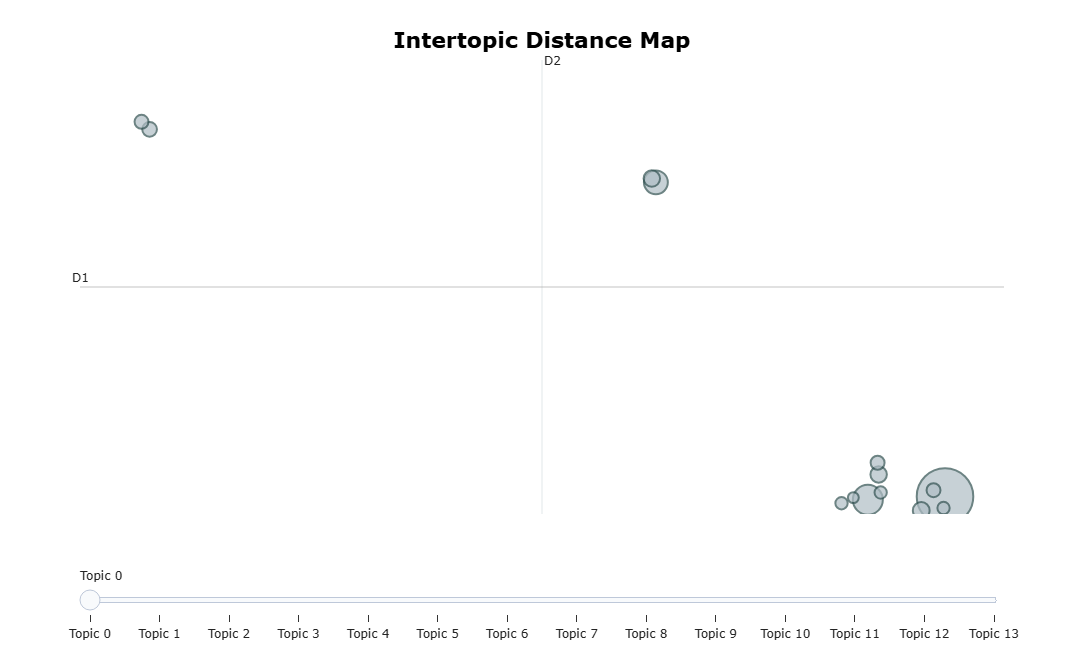

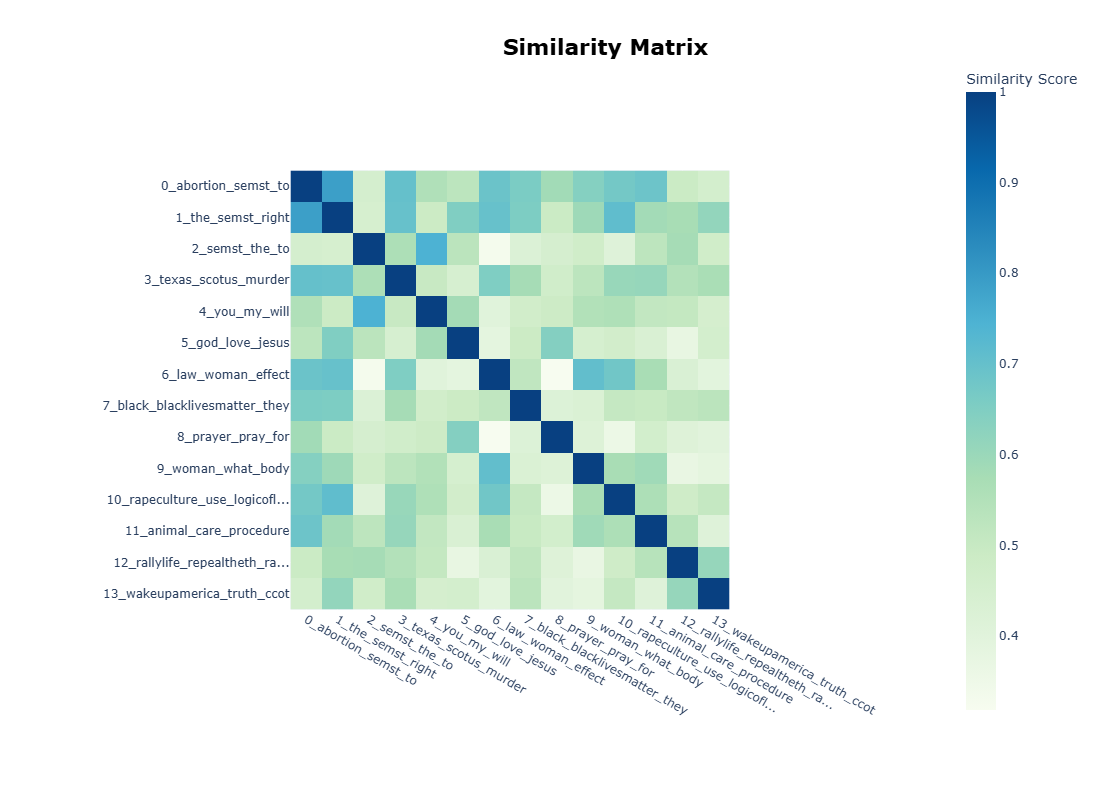

In [20]:
# Import required libraries for BERTopic
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import umap
import hdbscan

# Create a SentenceTransformer embedding model.
# "all-MiniLM-L6-v2" is a good balance between speed and performance.
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Define custom UMAP and HDBSCAN models for dimensionality reduction and clustering:
umap_model = umap.UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom')

# Initialize the BERTopic model with the custom settings
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model
)

# Prepare the documents for topic modeling from your preprocessed column
docs = df['unified_text'].tolist()

# Fit the BERTopic model and transform the documents into topics
topics, probs = topic_model.fit_transform(docs)

# Add the topic assignments as a new column in the dataframe
df['topic'] = topics

# (Optional) Display the topic distribution information
topic_info = topic_model.get_topic_info()
print(topic_info)

# Visualize the topics using the intertopic distance map.
# This interactive plot shows how the topics are positioned in a 2D space.
intertopic_distance_map = topic_model.visualize_topics()
intertopic_distance_map.show()

# Visualize the similarity heatmap which reflects the cosine similarities
# between topic centroids (or representative embeddings).
similarity_heatmap = topic_model.visualize_heatmap()
similarity_heatmap.show()

# (Optional) Save results to a file
df.to_excel("legalization_of_abortion_result_pre-processing.xlsx", index=False)

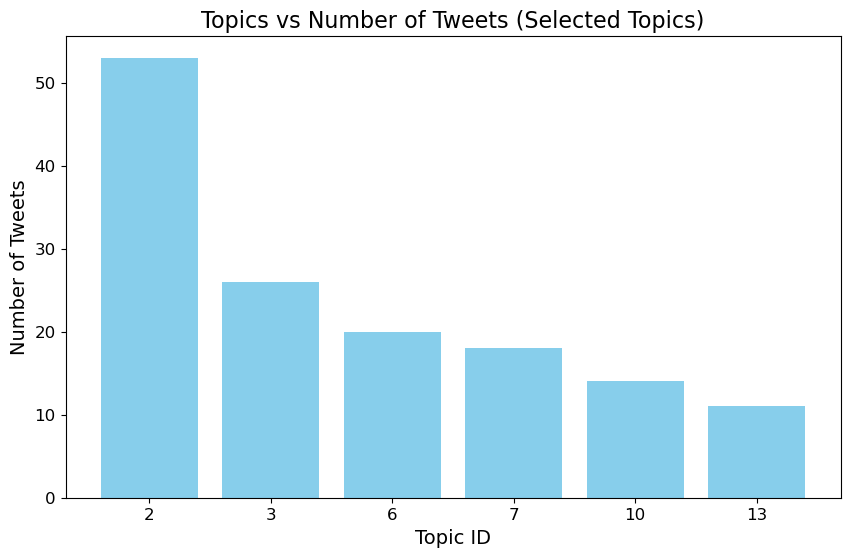

In [24]:
import matplotlib.pyplot as plt

# Assuming 'topic_info' is your DataFrame obtained via topic_model.get_topic_info()
# and df contains a column 'topic' with topic assignments.
# We'll filter and use the topic counts from topic_info.

# List of topics you want to plot
selected_topics = [2, 3, 6, 7, 10, 13]

# Filter topic_info for the selected topics.
# topic_info typically has a column "Topic" and "Count"
filtered_topic_info = topic_info[topic_info["Topic"].isin(selected_topics)]

# Sort the topics in decreasing order by 'Count'
filtered_topic_info = filtered_topic_info.sort_values("Count", ascending=False)

# Create the bar plot.
plt.figure(figsize=(10, 6))
plt.bar(filtered_topic_info["Topic"].astype(str), filtered_topic_info["Count"], color='skyblue')
plt.xlabel("Topic ID", fontsize=14)
plt.ylabel("Number of Tweets", fontsize=14)
plt.title("Topics vs Number of Tweets (Selected Topics)", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()